####Disclaimer: The above model is for references only

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tools.sm_exceptions import ValueWarning
import warnings
warnings.filterwarnings('ignore', category = ValueWarning)
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

In [2]:
df = pd.read_csv('Electric Production_Time Series.csv')

In [3]:
df

,DATE,IPG2211A2N
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

In [6]:
data = pd.read_csv('Electric Production_Time Series.csv', parse_dates = [0], index_col = 'DATE')

In [7]:
data

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [8]:
data.rename(columns = {'IPG2211A2N': 'Electricity_Production'}, inplace = True)




In [9]:
data

,Electricity_Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [10]:
data.tail()

,Electricity_Production
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


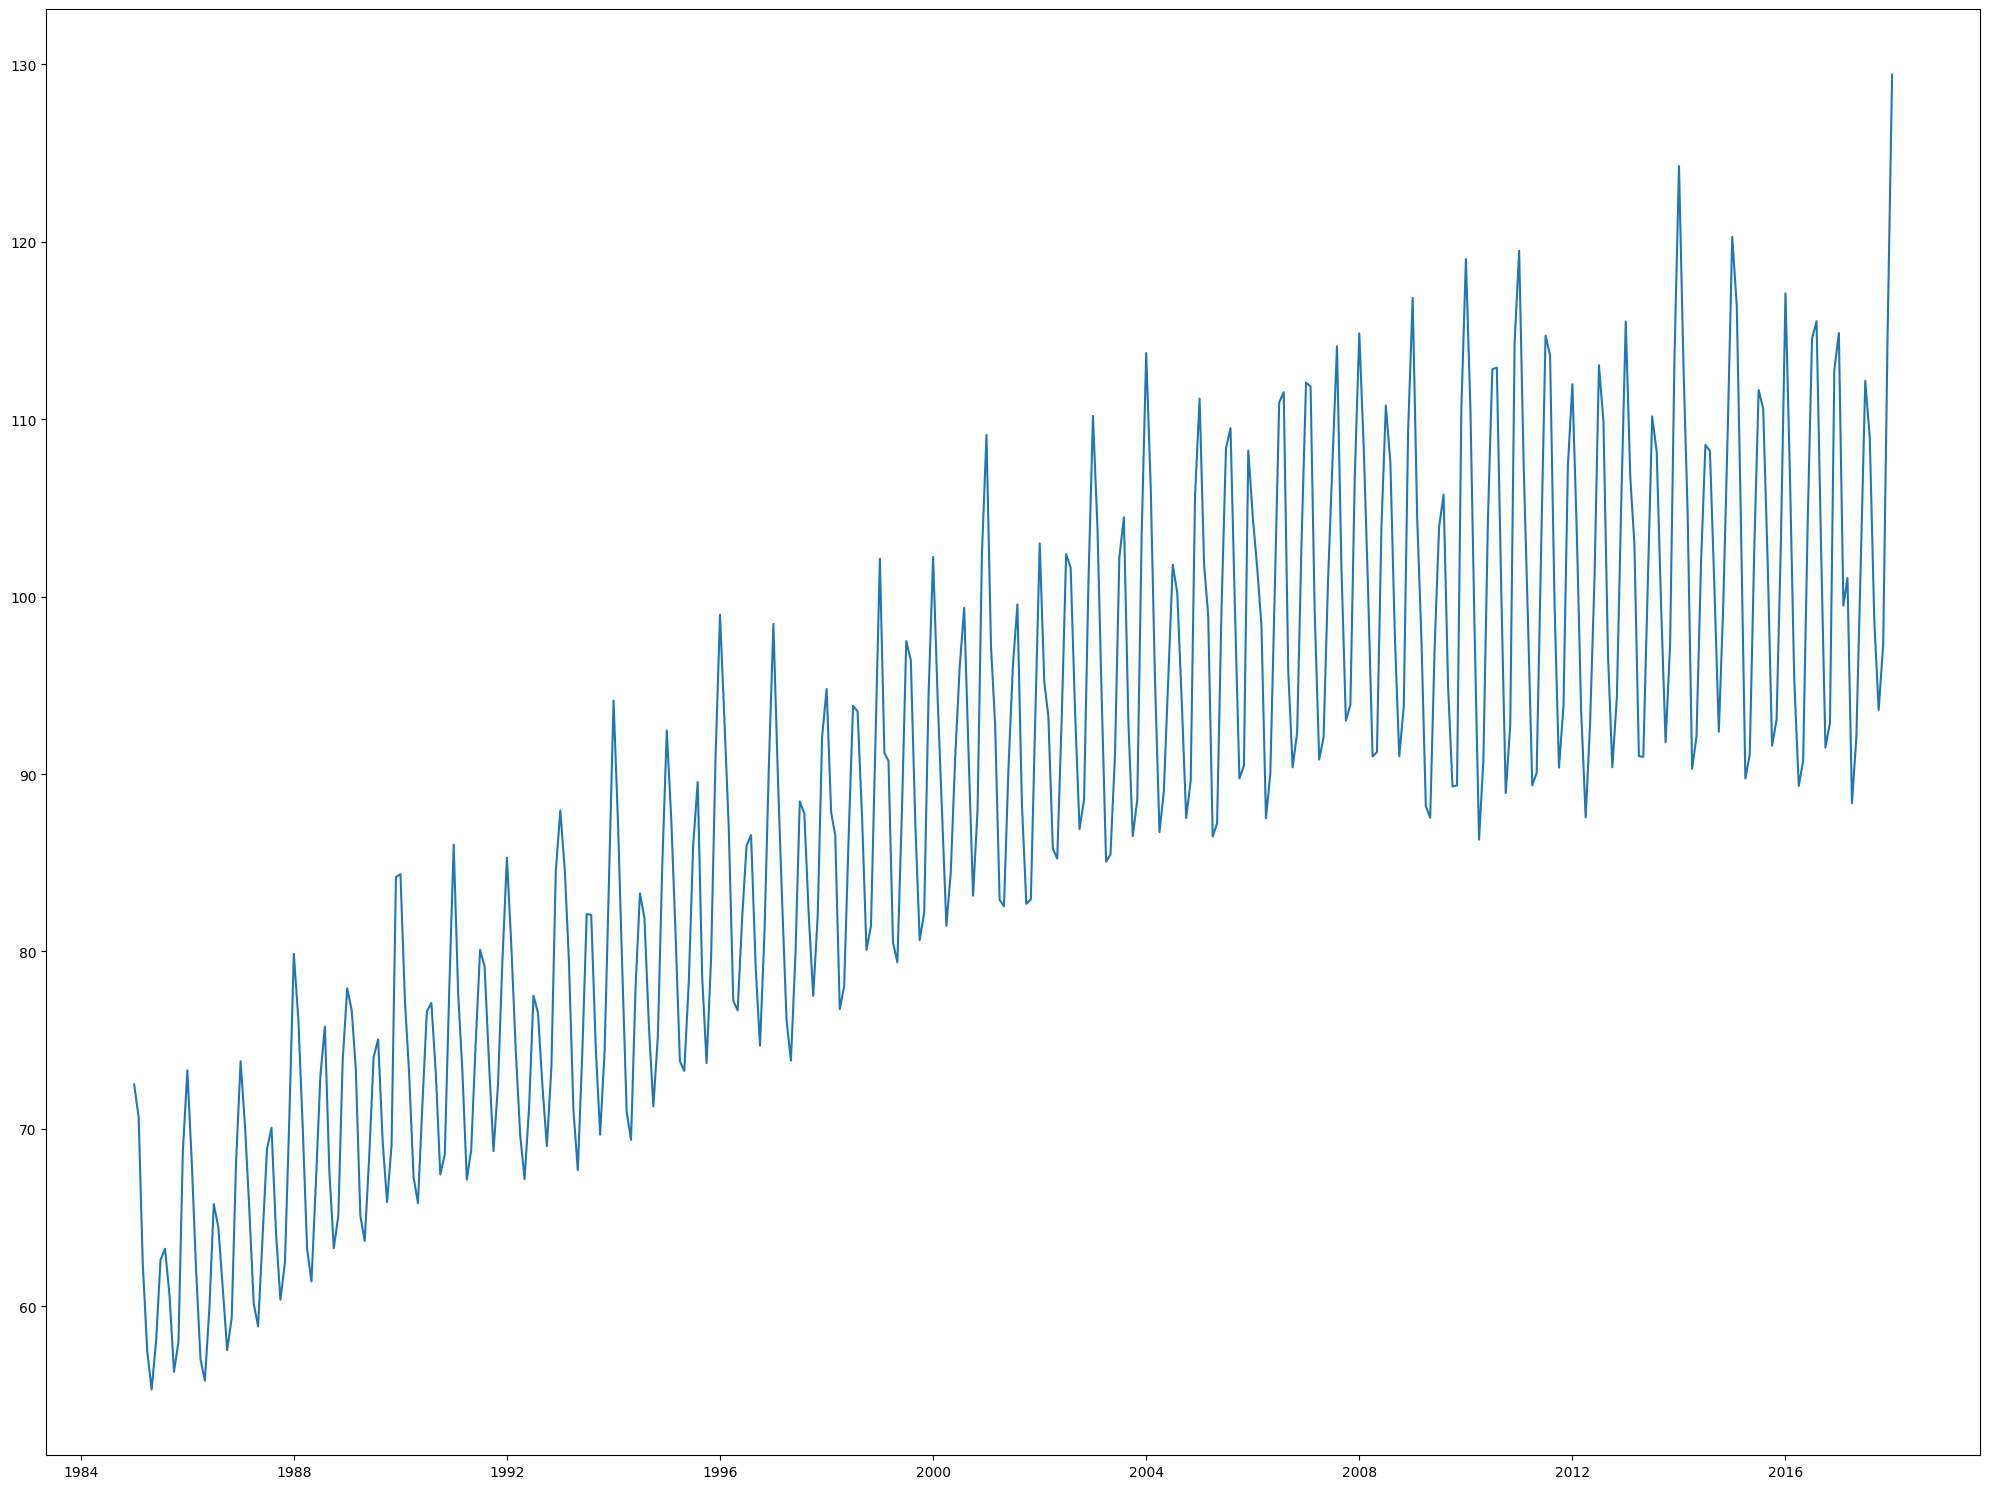

In [11]:
plt.figure(figsize=(20,15), facecolor = 'white')
plt.plot(data)
plt.tight_layout()

In [12]:
data.shape

(397, 1)

In [13]:
data.shape

(397, 1)

In [14]:
adf_test0 = adfuller(data.Electricity_Production, autolag = 'AIC')

In [15]:
adf_test0

(-2.256990350047253,
 0.18621469116586498,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

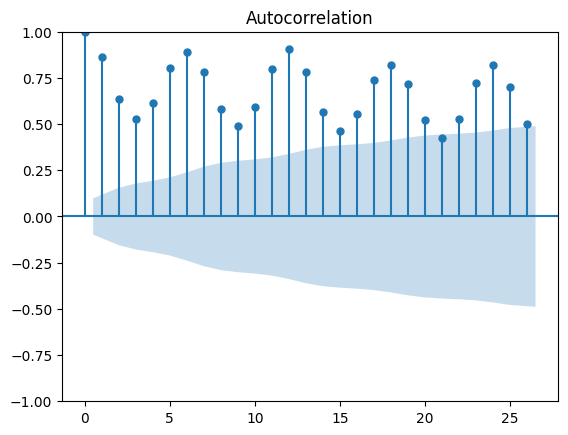

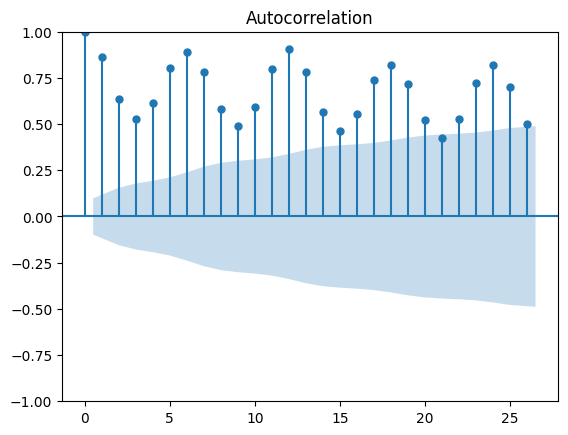

In [16]:
plot_acf(data)

In [17]:
train = data[:300]
test= data[300:]

In [18]:
order = ar_select_order(train, maxlag = 15, glob = True)
order.ar_lags

[1, 5, 11, 12, 13, 15]

In [19]:
model_ar = AutoReg(train, lags = [1, 5, 11, 12, 13, 15])
model_fit_ar = model_ar.fit()

In [23]:
prediction = model_fit_ar.forecast(steps = 97)

C:\Users\nandi\anaconda3\envs\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


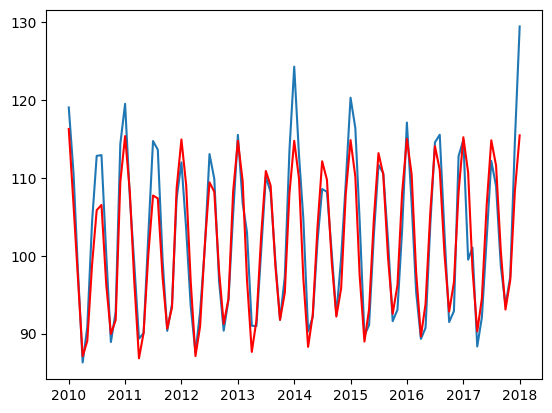

In [24]:
plt.plot(test[:97])
plt.plot(prediction, color = 'red')
plt.show()

In [25]:
r2_score(test, prediction)

0.8526883032309304

In [26]:
mean_squared_error(test, prediction)

14.227396215267435

In [27]:
mean_absolute_error(test, prediction)

2.8287343392013358

In [31]:
pickle.dump(model_fit_ar,open('model.pkl','wb'))